In [3]:
import fitsio
from matplotlib import pyplot as plt
from astropy.table import Table
from astropy.time import Time
import numpy as np
import os

In [2]:
#this contains info on unique targets available in dark time observations so far
fd = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ALLAlltiles_dark_full.dat.fits')

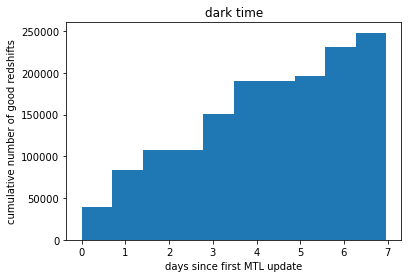

In [8]:
wz = fd['ZWARN'] == 0 #cut to "good" redshift
t = Time(fd[wz]['TIMESTAMP'], format='isot', scale='utc') #convert mtl timestamps to MJD
plt.hist(t.mjd-np.min(t.mjd),cumulative=True) #plot build-up of good redshifts
plt.xlabel('days since first MTL update')
plt.ylabel('cumulative number of good redshifts')
plt.title('dark time')
plt.show()

In [5]:
#this contains info on unique targets available in bright time observations so far
fb = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ALLAlltiles_bright_full.dat.fits')

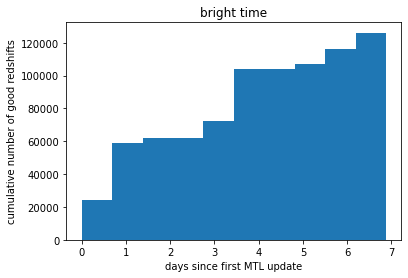

In [9]:
#repeat for bright time
wz = fb['ZWARN'] == 0 #cut to "good" redshift
t = Time(fb[wz]['TIMESTAMP'], format='isot', scale='utc') #convert mtl timestamps to MJD
plt.hist(t.mjd-np.min(t.mjd),cumulative=True) #plot build-up of good redshifts
plt.xlabel('days since first MTL update')
plt.ylabel('cumulative number of good redshifts')
plt.title('bright time')
plt.show()

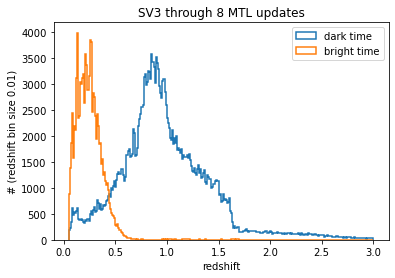

In [11]:
#look at total redshift distributions for both
wz = fd['ZWARN'] == 0
zx = 3
zm = 0.05
nbin = int((zx-zm)/.01)
plt.hist(fd[wz]['Z'],range=(0.05,3),bins=nbin,histtype='step',label='dark time',lw=1.5)
wzb = fb['ZWARN'] == 0
plt.hist(fb[wzb]['Z'],range=(0.05,3),bins=nbin,histtype='step',label='bright time',lw=1.5)
plt.xlabel('redshift')
plt.ylabel('# (redshift bin size 0.01)')
plt.title('SV3 through 8 MTL updates')
plt.legend()
plt.show()

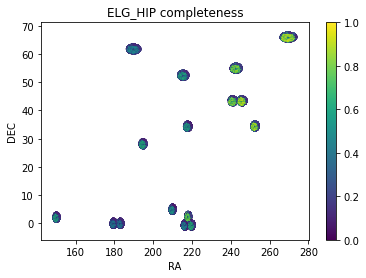

In [13]:
#look at completeness
fef = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ELG_HIPAlltiles_full.dat.fits')
plt.scatter(fef['RA'],fef['DEC'],c=fef['COMP_TILE'],s=.3)
plt.colorbar()
#plt.xlim(214,222)
#plt.ylim(-3,5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('ELG_HIP completeness')
plt.show()

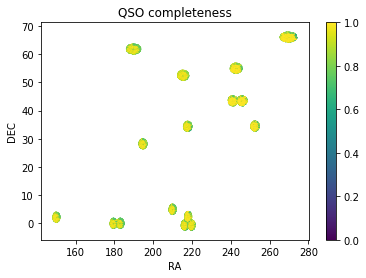

In [15]:
#look at completeness
fqf = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/QSOAlltiles_full.dat.fits')
plt.scatter(fqf['RA'],fqf['DEC'],c=fqf['COMP_TILE'],s=.3)
plt.colorbar()
#plt.xlim(214,222)
#plt.ylim(-3,5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('QSO completeness')
plt.show()

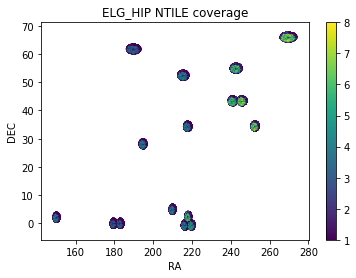

In [16]:
#look at NTILE
fef = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ELG_HIPAlltiles_full.dat.fits')
plt.scatter(fef['RA'],fef['DEC'],c=fef['NTILE'],s=.3)
plt.colorbar()
#plt.xlim(214,222)
#plt.ylim(-3,5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('ELG_HIP NTILE coverage')
plt.show()

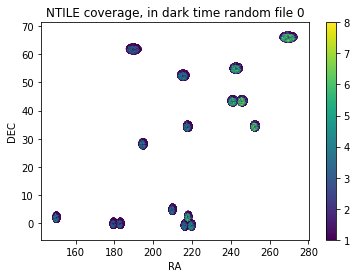

In [18]:
#check it is the same in the randoms
#for this, we actually have to compare back to the combined dark time, since the randoms have many early positions vetoed, especially for ELGs
ref = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/random0/rancomb_dark_Alltiles.fits')
plt.scatter(ref['RA'],ref['DEC'],c=ref['NTILE'],s=.3)
plt.colorbar()
#plt.xlim(214,222)
#plt.ylim(-3,5)
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('NTILE coverage, in dark time random file 0')
plt.show()

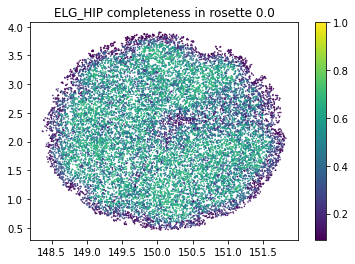

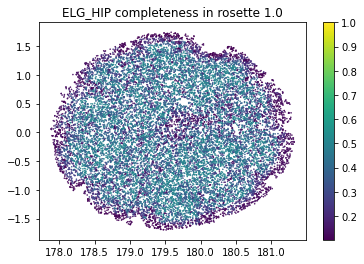

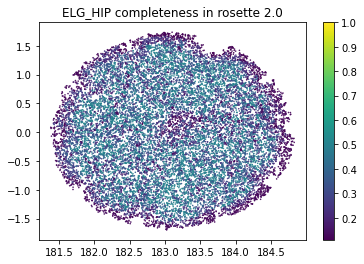

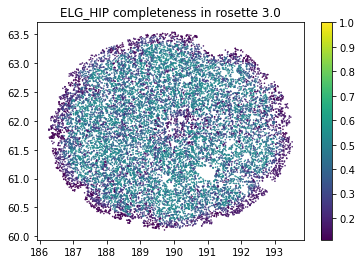

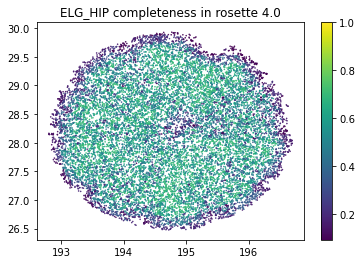

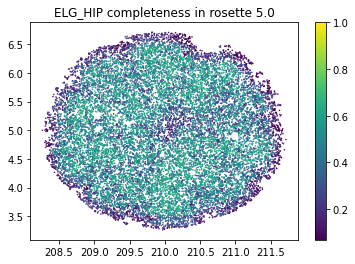

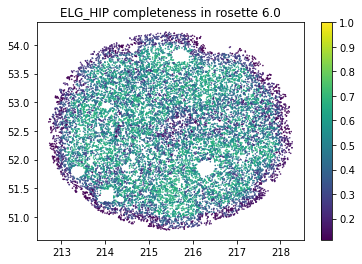

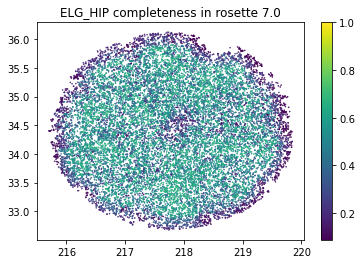

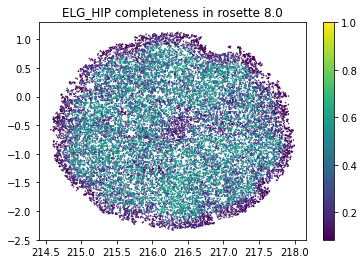

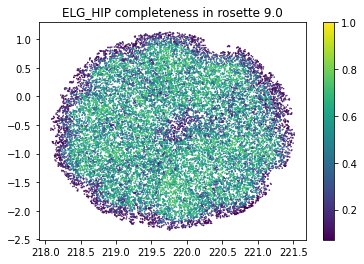

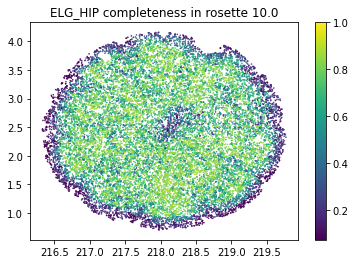

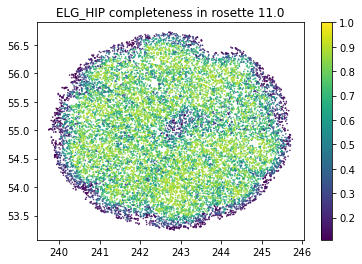

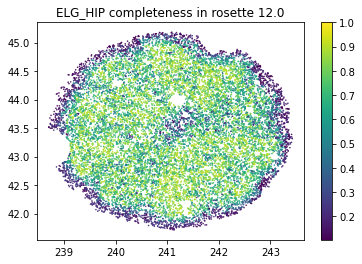

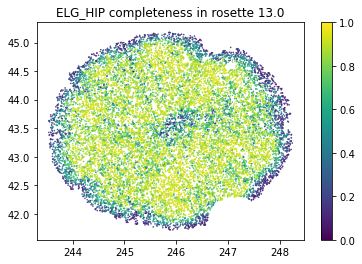

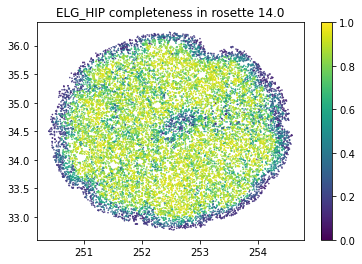

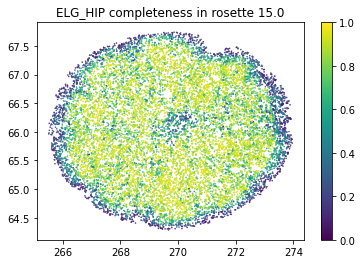

In [20]:
#Look at completeness per rosette
for ros in np.unique(fef['rosette_number']):
    wr = fef['rosette_number'] == ros
    plt.scatter(fef[wr]['RA'],fef[wr]['DEC'],c=fef[wr]['COMP_TILE'],s=.3,vmax=1)
    plt.title('ELG_HIP completeness in rosette '+str(ros))
    plt.colorbar()
    plt.show()

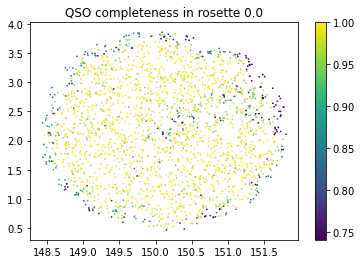

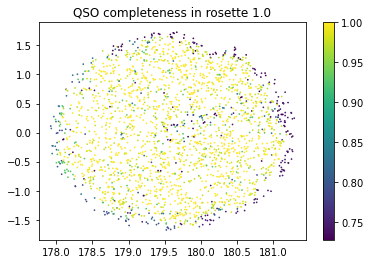

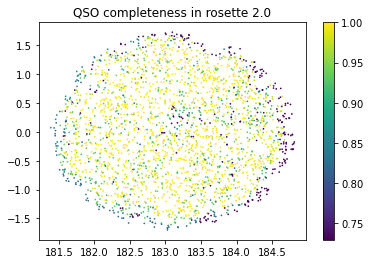

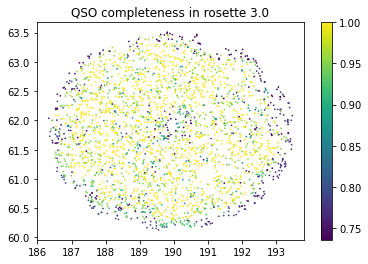

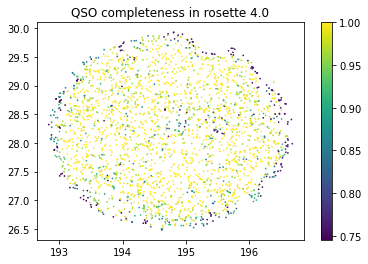

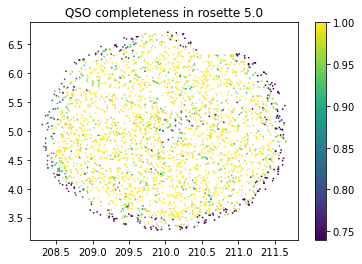

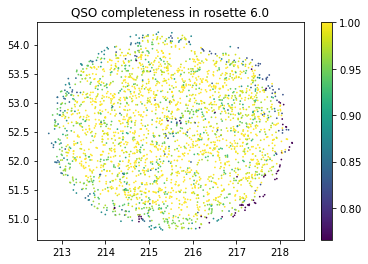

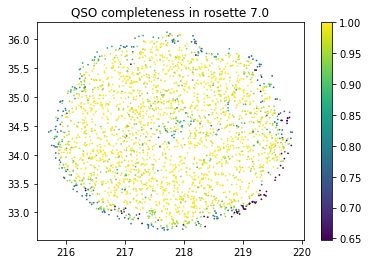

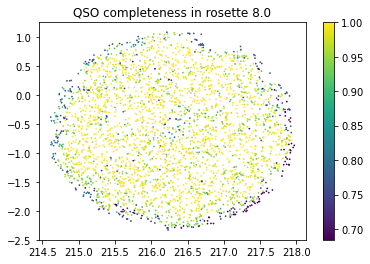

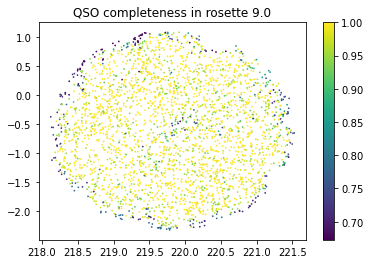

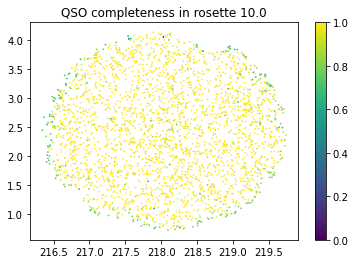

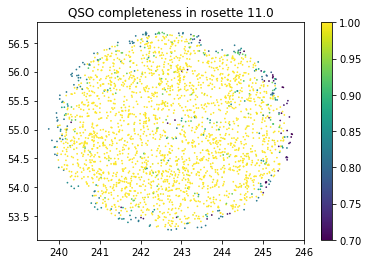

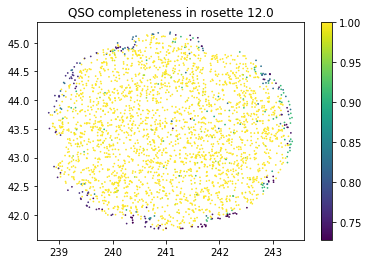

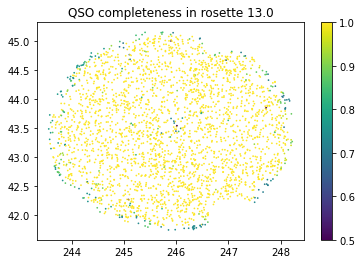

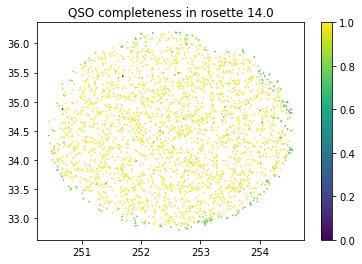

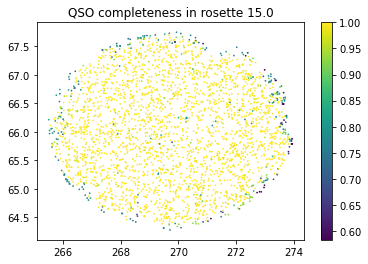

In [25]:
#Look at completeness per rosette
for ros in np.unique(fqf['rosette_number']):
    wr = fqf['rosette_number'] == ros
    plt.scatter(fqf[wr]['RA'],fqf[wr]['DEC'],c=fqf[wr]['COMP_TILE'],s=.5,vmax=1)
    plt.title('QSO completeness in rosette '+str(ros))
    plt.colorbar()
    plt.show()

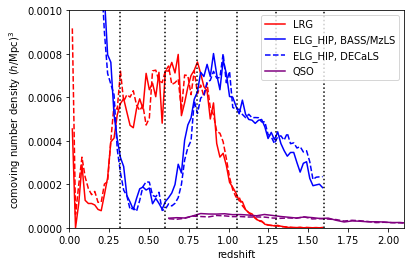

In [30]:
#plot n(z)
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/LRG_N_nz.dat').transpose()
plt.plot(nz[0],nz[3],'r-',label='LRG')
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/LRG_S_nz.dat').transpose()
plt.plot(nz[0],nz[3],'r--')
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ELG_HIP_N_nz.dat').transpose()
plt.plot(nz[0],nz[3],'b-',label='ELG_HIP, BASS/MzLS')
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/ELG_HIP_S_nz.dat').transpose()
plt.plot(nz[0],nz[3],'b--',label='ELG_HIP, DECaLS')
plt.ylim(0,.001)
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/QSO_N_nz.dat').transpose()
plt.plot(nz[0],nz[3],'-',color='purple',label='QSO')
nz = np.loadtxt('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/QSO_S_nz.dat').transpose()
plt.plot(nz[0],nz[3],'--',color='purple')
plt.legend()
plt.xlim(0,2.1)
xl = [0.32,0.32]
yl = [0,0.001]
plt.plot(xl,yl,'k:')
xl = [0.6,0.6]
yl = [0,0.001]
plt.plot(xl,yl,'k:')
xl = [0.8,0.8]
yl = [0,0.001]
plt.plot(xl,yl,'k:')
xl = [1.05,1.05]
yl = [0,0.001]
plt.plot(xl,yl,'k:')
xl = [1.3,1.3]
yl = [0,0.001]
plt.plot(xl,yl,'k:')
xl = [1.6,1.6]
yl = [0,0.001]
plt.plot(xl,yl,'k:')
plt.xlabel('redshift')
plt.ylabel(r'comoving number density ($h$/Mpc)$^3$')
plt.show()

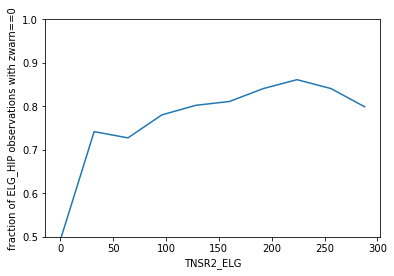

In [36]:
#look at redshift success vs TSNR
wo = fef['LOCATION_ASSIGNED'] == 1 #select the locations that were assigned
wz = fef['ZWARN'] == 0 #how we are currently selecting good redshifts
a = plt.hist(fef[wo]['TSNR2_ELG'],range=(0,320))
b = plt.hist(fef[wo&wz]['TSNR2_ELG'],range=(0,320),histtype='step')
plt.clf()
plt.plot(a[1][:-1],b[0]/a[0])
plt.xlabel('TNSR2_ELG')
plt.ylabel('fraction of ELG_HIP observations with zwarn==0')
plt.ylim(0.5,1)
plt.show()

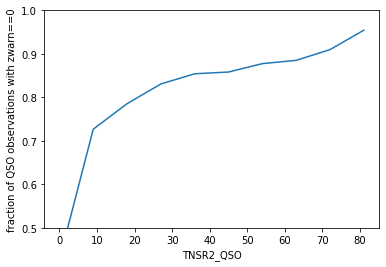

In [46]:
#look at redshift success vs TSNR for QSO
wo = fqf['LOCATION_ASSIGNED'] == 1 #select the locations that were assigned
wl = fqf['TSNR2_QSO'] != 1e+20 #for some reason there are ~100 of these, this is the null value
wz = fqf['ZWARN'] == 0 #how we are currently selecting good redshifts
a = plt.hist(fqf[wo]['TSNR2_QSO'],range=(0,90))
b = plt.hist(fqf[wz]['TSNR2_QSO'],range=(0,90),histtype='step')
plt.clf()
plt.plot(a[1][:-1],b[0]/a[0])
plt.xlabel('TNSR2_QSO')
plt.ylabel('fraction of QSO observations with zwarn==0')
plt.ylim(0.5,1)
plt.show()

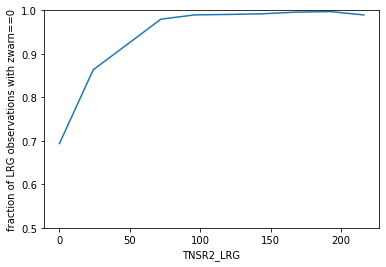

In [51]:
flf = fitsio.read('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/LSScats/test/LRGAlltiles_full.dat.fits')
wo = flf['LOCATION_ASSIGNED'] == 1 #select the locations that were assigned
wl = flf['TSNR2_LRG'] != 1e+20 #for some reason there are ~100 of these, this is the null value
wz = flf['ZWARN'] == 0 #how we are currently selecting good redshifts
a = plt.hist(flf[wo]['TSNR2_LRG'],range=(0,240))
b = plt.hist(flf[wz]['TSNR2_LRG'],range=(0,240),histtype='step')
plt.clf()
plt.plot(a[1][:-1],b[0]/a[0])
plt.xlabel('TNSR2_LRG')
plt.ylabel('fraction of LRG observations with zwarn==0')
plt.ylim(0.5,1)
plt.show()

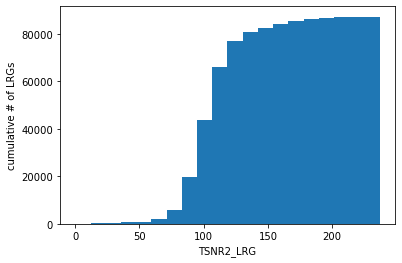

In [57]:
plt.hist(flf[wo&wl]['TSNR2_LRG'],bins=20,cumulative=True)
plt.xlabel('TSNR2_LRG')
plt.ylabel('cumulative # of LRGs')
plt.show()

In [49]:
np.max(flf[wo&wz&wl]['TSNR2_LRG'])

236.83165